# It's Just a Phase
<a id="0"></a> <br>
1. [Codercise I.5.1 - The Pauli Z gate](#1)
2. [Codercise I.5.2 - The Z Rotation](#2)
3. [Codercise I.5.3 - The S and T gates](#3)

In [1]:
import numpy as np
import pennylane as qml
import math

<a id="1"></a>
# Codercise I.5.1 - The Pauli Z gate

In [4]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    # CREATE THE |+> STATE
    qml.Hadamard(0)
    # APPLY PAULI Z
    qml.PauliZ(0)
    # RETURN THE STATE
    return qml.state()

print(apply_z_to_plus())

[ 0.70710678+0.j -0.70710678+0.j]


<a id="2"></a>
# Codercise I.5.2 -The Z Rotation

In [2]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    # CREATE THE |+> STATE
    qml.Hadamard(0)
    # APPLY RZ
    qml.RZ(np.pi, 0)
    # RETURN THE STATE
    return qml.state()

<a id="3"></a>
# Codercise I.5.3 - The S and T gates

In [11]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(0)
    qml.S(0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3, wires=0)
    qml.adjoint(qml.S)(wires=0)

    # RETURN THE STATE
    return qml.state()

**Codercise I.5.4.**
 The  gate plays an important role in more advanced quantum computing topics; specifically, it is a required operation in some fault-tolerant frameworks. However, it is much more resource intensive to implement in those frameworks than other gates, and therefore a common task in quantum circuit design is minimization of the T-count and T-depth (i.e., the number of layers of depth in a circuit which contain a T/T*). Many such tools for optimizing quantum circuits are automated, however we can work out a simple example by hand. Suppose that we want to implement the following circuit:
 ![circuit](./images/I.5.4.png)
 That’s an awful lot of s! Implement this same circuit in PennyLane as a QNode just_enough_ts, but minimize the number of  gates by replacing sequences of them with other gates that have the same effect. Using the gates you learned before, how much can you simplify this circuit?

Then, answer the following questions:

* What are the original -count, -depth, and regular depth?
* What is the optimal -count?
* What are the optimal depth and -depth of the resulting circuit?
Record your answers in the variables provided in the code block below.

Tip. Recall that operations can be applied to different qubits by specifying the desired index in the wires variable.
[device and circuit information documentation](https://pennylane.ai/blog/2022/10/how-to-get-device-and-circuit-information/)


[9.53335322e-33 2.88889492e-34 1.37043116e-32 2.28090690e-33
 3.75000000e-01 1.25000000e-01 3.75000000e-01 1.25000000e-01]
[0.    0.    0.    0.    0.375 0.125 0.375 0.125]
{'gate_sizes': defaultdict(<class 'int'>, {1: 22}), 'gate_types': defaultdict(<class 'int'>, {'Hadamard': 9, 'T': 7, 'Adjoint(T)': 6}), 'num_operations': 22, 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_used_wires': 3, 'depth': 8, 'num_trainable_params': 0, 'num_device_wires': 3, 'device_name': 'default.qubit.autograd', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'autograd', 'diff_method': 'best', 'gradient_fn': 'backprop'}


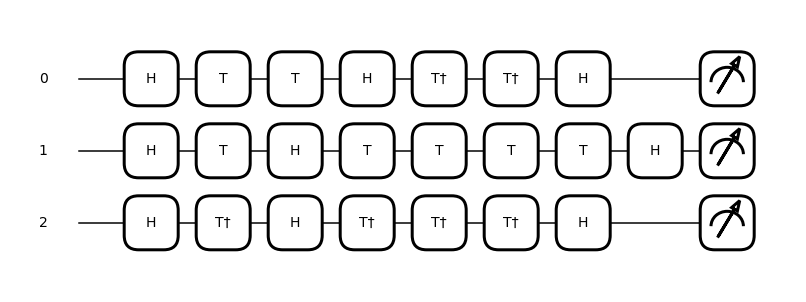

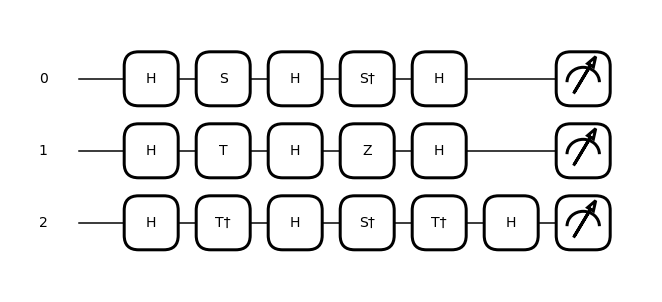

In [41]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def too_many_ts():
    """You can implement the original circuit here as well, it may help you with
    testing to ensure that the circuits have the same effect.

    Returns:
        array[float]: The measurement outcome probabilities.
    """
    for i in range(3):
       qml.Hadamard(i)
    for i in range(2):
        qml.T(i)
    qml.adjoint(qml.T)(wires = 2)
    qml.T(0)
    for i in range(3):
        qml.Hadamard(i)
    for i in range(2):
        qml.adjoint(qml.T)(wires = 0)
        qml.T(1)
        qml.adjoint(qml.T)(wires = 2)
    qml.T(1)
    qml.T(1)
    qml.adjoint(qml.T)(wires = 2)
    for i in range(3):
        qml.Hadamard(i)

    return qml.probs(wires=[0, 1, 2])

@qml.qnode(dev)
def just_enough_ts():
    """Implement an equivalent circuit as the above with the minimum number of
    T and T^\dagger gates required.

    Returns:
        array[float]: The measurement outcome probabilities.
    """

    # IMPLEMENT THE CIRCUIT, BUT COMBINE AND OPTIMIZE THE GATES
    # TO MINIMIZE THE NUMBER OF TS
    for i in range(3):
        qml.Hadamard(i)
    qml.S(0)
    qml.T(1)
    qml.adjoint(qml.T)(wires = 2)

    for i in range(3):
        qml.Hadamard(i)
    qml.adjoint(qml.S)(wires = 0)
    qml.PauliZ(1)
    qml.adjoint(qml.S)(wires = 2)
    qml.adjoint(qml.T)(wires = 2)
    for i in range(3):
        qml.Hadamard(i)


    return qml.probs(wires=[0, 1, 2])

print(too_many_ts())
print(just_enough_ts())
print(qml.specs(too_many_ts)())
qml.draw_mpl(too_many_ts)()
qml.draw_mpl(just_enough_ts)()

# FILL IN THE CORRECT VALUES FOR THE ORIGINAL CIRCUIT
original_depth = 8
original_t_count = 13
original_t_depth = 6

# FILL IN THE CORRECT VALUES FOR THE NEW, OPTIMIZED CIRCUIT
optimal_depth = 6
optimal_t_count = 3
optimal_t_depth = 2

The depth of the original circuit is 8, and there are 13 combined `T`  and `T*` gates. The original `T`-depth is 6.

We can replace pairs of `T` with `S` (and pairs of `T*` with `S*` ). You can see this by multiplying out the matrix representation of `T`, or just by considering that these are all special cases of `RZ` rotations, and the angles of the rotation combine additively. If ever there are four `T`, we can replace this with an `Z` (since two `S` make a `Z`). Thus, we obtain the circuit below:
The new depth is 6, the `T`-count is 3, and the `T`-depth is 2.